# Comparative Analysis
In this notebook, we compare Window with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
cost = "mahalanobis"
thresholds = np.round(np.arange(.05, 1., .05), 2)

methods = list()

for t in thresholds:
    candidate_name = f"{cost}-cost-{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/window_cost_threshold/{file_name}")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,mahalanobis-cost-0.05-threshold,mahalanobis-cost-0.1-threshold,mahalanobis-cost-0.15-threshold,mahalanobis-cost-0.2-threshold,mahalanobis-cost-0.25-threshold,mahalanobis-cost-0.3-threshold,mahalanobis-cost-0.35-threshold,mahalanobis-cost-0.4-threshold,mahalanobis-cost-0.45-threshold,mahalanobis-cost-0.5-threshold,mahalanobis-cost-0.55-threshold,mahalanobis-cost-0.6-threshold,mahalanobis-cost-0.65-threshold,mahalanobis-cost-0.7-threshold,mahalanobis-cost-0.75-threshold,mahalanobis-cost-0.8-threshold,mahalanobis-cost-0.85-threshold,mahalanobis-cost-0.9-threshold,mahalanobis-cost-0.95-threshold
0,DodgerLoopDay,0.060,0.051,0.047,0.038,0.038,0.062,0.049,0.065,0.049,0.049,0.064,0.064,0.063,0.062,0.062,0.061,0.061,0.060,0.060
1,EEGRat,0.170,0.302,0.544,0.549,0.594,0.597,0.563,0.564,0.611,0.611,0.611,0.609,0.609,0.704,0.728,0.729,0.730,0.596,0.597
2,EEGRat2,0.248,0.443,0.499,0.592,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,FaceFour,0.364,0.496,0.496,0.504,0.530,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281
4,GrandMalSeizures2,0.152,0.260,0.314,0.475,0.480,0.482,0.526,0.525,0.554,0.411,0.426,0.427,0.443,0.445,0.445,0.446,0.446,0.446,0.446
5,GreatBarbet1,0.772,0.683,0.688,0.716,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355
6,Herring,0.026,0.031,0.036,0.078,0.155,0.180,0.401,0.401,0.400,0.446,0.554,0.554,0.554,0.554,0.553,1.000,1.000,1.000,1.000
7,InlineSkate,0.046,0.043,0.055,0.058,0.059,0.069,0.069,0.070,0.077,0.088,0.087,0.100,0.118,0.126,0.126,0.166,0.182,0.196,0.263
8,InsectEPG1,0.161,0.350,0.534,0.724,0.931,0.891,0.888,0.883,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3301/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


mahalanobis-cost-0.05-threshold    0.227
mahalanobis-cost-0.1-threshold     0.288
mahalanobis-cost-0.15-threshold    0.334
mahalanobis-cost-0.2-threshold     0.379
mahalanobis-cost-0.25-threshold    0.402
mahalanobis-cost-0.3-threshold     0.422
mahalanobis-cost-0.35-threshold    0.419
mahalanobis-cost-0.4-threshold     0.414
mahalanobis-cost-0.45-threshold    0.409
mahalanobis-cost-0.5-threshold     0.393
mahalanobis-cost-0.55-threshold    0.404
mahalanobis-cost-0.6-threshold     0.405
mahalanobis-cost-0.65-threshold    0.395
mahalanobis-cost-0.7-threshold     0.400
mahalanobis-cost-0.75-threshold    0.401
mahalanobis-cost-0.8-threshold     0.425
mahalanobis-cost-0.85-threshold    0.427
mahalanobis-cost-0.9-threshold     0.421
mahalanobis-cost-0.95-threshold    0.416
dtype: float64

In [6]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3301/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


mahalanobis-cost-0.05-threshold    0.214
mahalanobis-cost-0.1-threshold     0.218
mahalanobis-cost-0.15-threshold    0.236
mahalanobis-cost-0.2-threshold     0.244
mahalanobis-cost-0.25-threshold    0.260
mahalanobis-cost-0.3-threshold     0.276
mahalanobis-cost-0.35-threshold    0.242
mahalanobis-cost-0.4-threshold     0.233
mahalanobis-cost-0.45-threshold    0.219
mahalanobis-cost-0.5-threshold     0.194
mahalanobis-cost-0.55-threshold    0.202
mahalanobis-cost-0.6-threshold     0.201
mahalanobis-cost-0.65-threshold    0.189
mahalanobis-cost-0.7-threshold     0.195
mahalanobis-cost-0.75-threshold    0.197
mahalanobis-cost-0.8-threshold     0.232
mahalanobis-cost-0.85-threshold    0.232
mahalanobis-cost-0.9-threshold     0.224
mahalanobis-cost-0.95-threshold    0.225
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

mahalanobis-cost-0.05-threshold:wins=7 rank=11.38095
mahalanobis-cost-0.1-threshold:wins=6 rank=11.09524
mahalanobis-cost-0.15-threshold:wins=7 rank=9.85714
mahalanobis-cost-0.2-threshold:wins=8 rank=7.57143
mahalanobis-cost-0.25-threshold:wins=9 rank=5.80952
mahalanobis-cost-0.3-threshold:wins=9 rank=4.80952
mahalanobis-cost-0.35-threshold:wins=7 rank=4.95238
mahalanobis-cost-0.4-threshold:wins=8 rank=4.28571
mahalanobis-cost-0.45-threshold:wins=9 rank=4.38095
mahalanobis-cost-0.5-threshold:wins=7 rank=5.0
mahalanobis-cost-0.55-threshold:wins=7 rank=4.33333
mahalanobis-cost-0.6-threshold:wins=8 rank=4.09524
mahalanobis-cost-0.65-threshold:wins=8 rank=4.47619
mahalanobis-cost-0.7-threshold:wins=8 rank=4.0
mahalanobis-cost-0.75-threshold:wins=8 rank=4.14286
mahalanobis-cost-0.8-threshold:wins=8 rank=3.7619
mahalanobis-cost-0.85-threshold:wins=9 rank=3.66667
mahalanobis-cost-0.9-threshold:wins=8 rank=4.28571
mahalanobis-cost-0.95-threshold:wins=9 rank=4.42857


Let's plot and output the ranks.

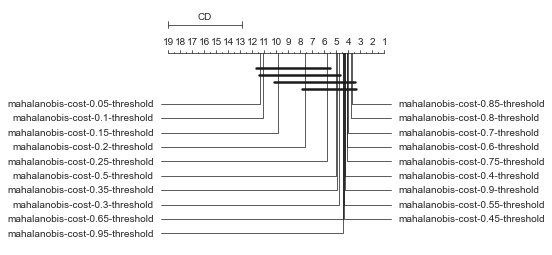

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, ranks.columns, cd=cd, reverse=True, width=5,
                                      filename=f"../../figures/cd_ablation_window_{cost}_threshold.pdf")

Let's compute wins/losses against ClaSP.

In [10]:
selection = "mahalanobis-cost-0.85-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.05-threshold: (wins/ties/losses): 12/6/3
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.1-threshold: (wins/ties/losses): 12/6/3
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.15-threshold: (wins/ties/losses): 11/7/3
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.2-threshold: (wins/ties/losses): 8/7/6
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.25-threshold: (wins/ties/losses): 6/9/6
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.3-threshold: (wins/ties/losses): 5/10/6
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.35-threshold: (wins/ties/losses): 5/11/5
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.4-threshold: (wins/ties/losses): 4/12/5
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.45-threshold: (wins/ties/losses): 5/13/3
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.5-threshold: (wins/ties/losses): 5/14/2
mahalanobis-cost-0.85-threshold vs mahalanobis-cost-0.55-

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3301/2574710515.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3301/2574710515.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


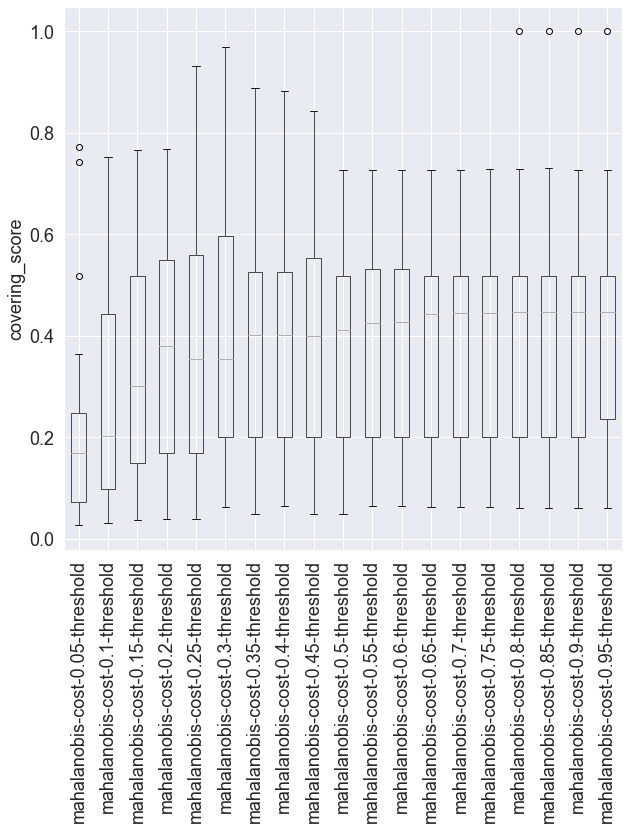

In [11]:
fontsize = 18
_, ax = plt.subplots(figsize=(10, 10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../../figures/bp_ablation_window_{cost}_threshold.pdf", bbox_inches="tight") 